In [12]:
import os
import pandas as pd
from sklearn.svm import SVC
import random
import cv2
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np

In [4]:
X = [[0, 0], [1, 1]]
y = [0, 1]

modelo = SVC()
modelo.fit(X,y)

SVC()

In [5]:
modelo.predict([[0,0],[1,0],[0,1],[1,1],[0.49,0.49]])

array([0, 1, 1, 1, 0])

In [6]:
# Descobrir caminhos de imagens e classificação
images_path = '../dataset_converted'

# loaded variables
df = pd.DataFrame(columns=['path','classification'])
classification_label = []

for f_number, folder in enumerate(os.listdir(images_path)):
    folder_path = os.path.join(images_path, folder)
    classification_label.append(folder)
    for image in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image)
        df.loc[0 if pd.isnull(df.index.max()) else df.index.max() + 1] = [image_path, f_number]

classification_label, df

(['ASC-H',
  'ASC-US',
  'HSIL',
  'LSIL',
  'Negative for intraepithelial lesion',
  'SCC'],
                                       path  classification
 0     ../dataset_converted\ASC-H\11470.png               0
 1     ../dataset_converted\ASC-H\11471.png               0
 2     ../dataset_converted\ASC-H\11472.png               0
 3      ../dataset_converted\ASC-H\7716.png               0
 4      ../dataset_converted\ASC-H\7717.png               0
 ...                                    ...             ...
 5576     ../dataset_converted\SCC\8057.png               5
 5577     ../dataset_converted\SCC\8058.png               5
 5578     ../dataset_converted\SCC\8126.png               5
 5579     ../dataset_converted\SCC\8127.png               5
 5580     ../dataset_converted\SCC\8128.png               5
 
 [5581 rows x 2 columns])

In [71]:
# Carregar as imagens e fazer pré-processamento

def preprocess_image(image_path):
   # Carregar a imagem em escala de cinza
   image = np.array(Image.open(image_path).convert('L'))
   # Aplicar equalização de histograma
   equalized_image = cv2.equalizeHist(image)
   return equalized_image.ravel()

In [72]:
df['image'] = df['path'].apply(preprocess_image)
df

,path,classification,image
0,../dataset_converted\ASC-H\11470.png,0,"[21, 27, 28, 34, 38, 34, 34, 37, 38, 42, 37, 3..."
1,../dataset_converted\ASC-H\11471.png,0,"[131, 131, 127, 144, 168, 158, 137, 131, 134, ..."
2,../dataset_converted\ASC-H\11472.png,0,"[136, 154, 163, 171, 176, 177, 138, 125, 140, ..."
3,../dataset_converted\ASC-H\7716.png,0,"[99, 96, 80, 59, 49, 52, 57, 64, 62, 61, 62, 5..."
4,../dataset_converted\ASC-H\7717.png,0,"[12, 15, 27, 89, 139, 150, 128, 104, 112, 122,..."
...,...,...,...
5576,../dataset_converted\SCC\8057.png,5,"[46, 30, 13, 6, 4, 2, 4, 8, 9, 9, 8, 8, 11, 16..."
5577,../dataset_converted\SCC\8058.png,5,"[144, 159, 172, 176, 163, 163, 184, 180, 164, ..."
5578,../dataset_converted\SCC\8126.png,5,"[91, 94, 88, 70, 47, 41, 59, 83, 105, 134, 155..."
5579,../dataset_converted\SCC\8127.png,5,"[189, 143, 88, 60, 39, 24, 10, 6, 6, 1, 0, 2, ..."


In [60]:
# Plotar a imagem original e a equalizada
def plot_images(original, equalized):
    plt.figure(figsize=(10, 5))
    # Mostrar imagem original
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(original, cmap='gray')
    plt.axis('off')
    # Mostrar imagem equalizada
    plt.subplot(1, 2, 2)
    plt.title("Equalized Image")
    plt.imshow(equalized, cmap='gray')
    plt.axis('off')
    plt.show()

In [73]:
# Pré-processar a imagem
# original_image, equalized_image = preprocess_image(df['path'][100])

ValueError: too many values to unpack (expected 2)

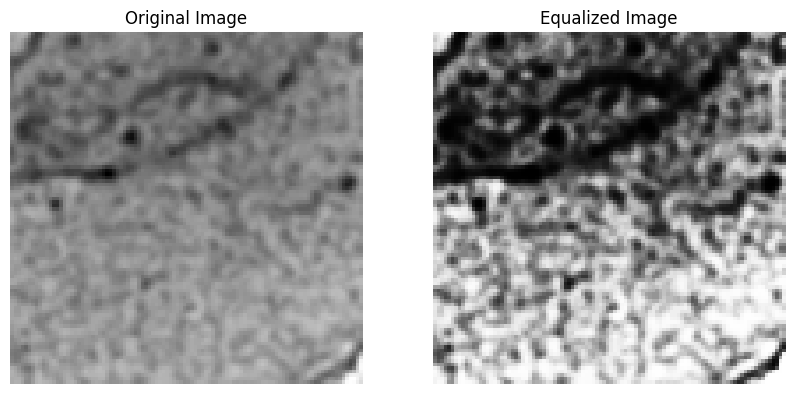

In [44]:
# Plotar as imagens
plot_images(original_image, equalized_image)

In [74]:
print(df['image'].head())

0    [21, 27, 28, 34, 38, 34, 34, 37, 38, 42, 37, 3...
1    [131, 131, 127, 144, 168, 158, 137, 131, 134, ...
2    [136, 154, 163, 171, 176, 177, 138, 125, 140, ...
3    [99, 96, 80, 59, 49, 52, 57, 64, 62, 61, 62, 5...
4    [12, 15, 27, 89, 139, 150, 128, 104, 112, 122,...
Name: image, dtype: object


In [75]:
# Converter a coluna 'image' para uma matriz 2D adequada para o SVC
X = np.vstack(df['image'].values)
y = df['classification'].values

In [76]:
# Treinar o modelo SVC
modelo = SVC()
modelo.fit(X, y)